### Importing Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Load data

In [53]:
data = pd.read_csv("OnlineRetail.csv",encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Understanding the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.shape

(541909, 8)

### Data Cleansing

In [54]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df_null = round(100*(data.isnull().sum())/len(data),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [55]:
data = data.dropna()
data.shape

(406829, 8)

In [56]:
data = data.drop(['StockCode'], axis=1)

In [11]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [57]:
data["CustomerID"] = data["CustomerID"].astype('str')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   Description  406829 non-null  object 
 2   Quantity     406829 non-null  int64  
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  object 
 6   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ MB


### Data Preparation

In [58]:
# Calculating the total amount for each customer
data['Amount'] = data['Quantity']*data['UnitPrice']
rfm_m = data.groupby("CustomerID")["Amount"].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [59]:
# The highest sold Product
monetary_data = data.groupby("Description")['Quantity'].sum()
monetary_data = monetary_data.reset_index()
monetary_data.sort_values(by="Quantity", ascending=False).head()

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409


In [60]:
# Country with the highest sales
most_bought_product = data.groupby("Country")["Quantity"].sum()
most_bought_product = most_bought_product.reset_index()
most_bought_product.sort_values(by='Quantity', ascending=False).head()

,Country,Quantity
35,United Kingdom,4008533
23,Netherlands,200128
10,EIRE,136329
14,Germany,117448
13,France,109848


In [61]:
monetary_data = data.groupby("Description")['InvoiceNo'].count()
monetary_data = monetary_data.reset_index()
monetary_data.sort_values(by="InvoiceNo", ascending=False)

,Description,InvoiceNo
3716,WHITE HANGING HEART T-LIGHT HOLDER,2070
2780,REGENCY CAKESTAND 3 TIER,1905
1771,JUMBO BAG RED RETROSPOT,1662
217,ASSORTED COLOUR BIRD ORNAMENT,1418
2355,PARTY BUNTING,1416
...,...,...
453,BLUE NEW BAROQUE FLOCK CANDLESTICK,1
1720,IVORY SHELL HEART EARRINGS,1
457,BLUE PAINTED KASHMIRI CHAIR,1
1712,IVORY PANTRY HANGING LAMP,1


In [62]:
dt = data.Description.value_counts()
dt

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: count, Length: 3896, dtype: int64

In [63]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%m/%d/%Y %H:%M")
data

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Description  406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  object        
 6   Country      406829 non-null  object        
 7   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [64]:
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [65]:
min_date = min(data['InvoiceDate'])
min_date

Timestamp('2010-12-01 08:26:00')

In [66]:
dt = max_date - min_date
dt

Timedelta('373 days 04:24:00')

#### Calculating the total sales over the last one month

In [67]:
from datetime import timedelta
one_month_ago = max_date - timedelta(days=30)

# Filter the data for the last month
last_month_data = data[data['InvoiceDate'] >= one_month_ago]

# Calculate the total sales for the last month
total_sales_last_month = last_month_data['Amount'].sum()

total_sales_last_month

1156014.39

#### Calculating the total number of sales over the last one month

In [68]:
total_sales_number_last_month = last_month_data['Amount'].count()
print(f"{total_sales_number_last_month} transactions")

66632 transactions


In [69]:
rfm_f = data.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [70]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [71]:
data['Diff'] = max_date - data['InvoiceDate']
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [72]:
# Compute last transaction date to get the recency of customers

rfm_p = data.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [73]:
# Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [74]:
# Merge tha dataframes to get the final RFM dataframe

new_df = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
new_df.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
new_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [75]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [76]:
# Rescaling the attributes

features = new_df[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
scaled_features = scaler.fit_transform(features)
scaled_features.shape

(4372, 3)

### Building Kmeans Model

In [78]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_features)

KMeans(max_iter=50, n_clusters=4)

In [79]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [80]:
import matplotlib.pyplot as plt

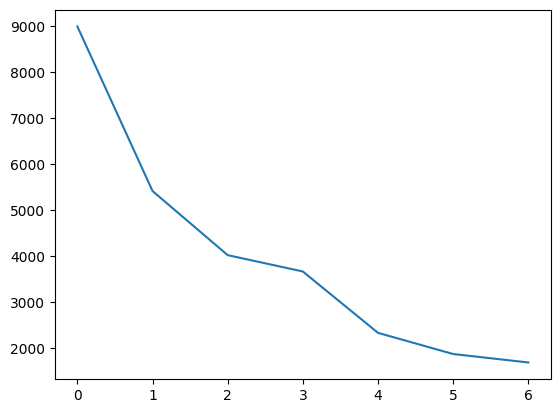

In [81]:

fits = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_features)
    
    fits.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(fits)